# BAIT 509: Business Applications of Machine Learning
## Lecture 5 - Logistic regression, naive Bayes and some case studies
Tomas Beuzen, 20th January 2020

# Lecture outline
- [0. Recap (5 mins)](#0)
- [1. Lecture learning objectives](#1)
- [2. No free lunch theorem (5 mins)](#2)
- [3. Logistic regression (40 mins)](#3)
- [--- Break --- (10 mins)](#break)
- [4. Naive Bayes (30 mins)](#4)
- [5. Logistic Regression vs Naive Bayes (5 mins)](#5)
- [6. True/false questions (5 mins)](#6)
- [7. Summary questions to ponder](#7)

# Announcements

- Assignment 1 due **tonight at 11:59pm**.
- Assignment 2 will be released tomorrow morning and will be due next **Monday (27th Jan) at 11:59pm**.

# 0. Recap  (5 mins) <a id=0></a>

- The problems of having numeric data on different scales
- Scaling numeric data (normalization, standardization)
- How to properly implement scaling in a ML workflow (the golden rule)
- Encoding categorical data (label encoding, one hot encoding)

# 1. Lecture learning objectives <a id=1></a>

- Introduce and use logistic regression
- Introduce and use naive Bayes

# 2. No free lunch theorem (5 mins) <a id=2></a>

<img src='./img/nofreelunch.png' width="200"> 

- There's an important theorem in ML called the "[No free lunch theorem](https://www.kdnuggets.com/2019/09/no-free-lunch-data-science.html)"
- Essentially, this states that there is no one ML model that is best for all problems
- In practice, we usually try lots of different models (more on that next lecture)
- However, some models have proved to be generally more effective for particular problems
- The two that we will look at today are:
    - Logistic regression
    - Naive Bayes

# 3. Logistic Regression (40 mins) <a id=3></a>

## 3.1 A conceptual introduction

- We all know about linear regression
- We use linear regression for predicting a continuous response variable with the form:
$$Y = \beta_0+\beta_1X$$
- But can we use linear regression for classification?
- Yes we can and we call this **LOGISTIC REGRESSION**
- In logistic regression we model the __*probabilities*__ of the different outcomes
- Let's take a look at some toy data classifying tumor state based on tumor size
- Our goal of logistic regression is to model the __*probability*__ that a particular tumor size is *Malignant*

<img src='./img/tumor_data.png' width="200"> 

- We want to model probabilities
- So, the first thing we can do is encode our class labels with 0 (benign) and 1 (malignant) to make them numeric and ranging from 0 to 1

<img src='./img/tumor_1.png' width="500"> 

- We can then fit a least-squares linear regression model as normal...
- (By the way R encodes categorical data automatically when fitting a linear model using `lm()`, Python does not)

<img src='./img/tumor_2.png' width="500"> 

- Okay so we've now fit a line to our data, how can we use that to predict a class `benign (0)` or `malignant (1)`?
- Well we can simply use the threshold $P(malignant) = 0.5$ as our "decision boundary"
- If $P(malignant) < 0.5$, call the tumor `benign`
- If $P(malignant) > 0.5$ call the tumor `malignant`

<img src='./img/tumor_3.png' width="500"> 

- But there are a few problems with our simple least squares regression approach...

### Problem 1: Probabilities < 0  or > 1 don't make sense
- Our predictions of $P(malignant)$ are not confined between 0 and 1
- The actual equation of the above line is
$$ P(malignant) = -0.2 + 0.13*tumor\_size$$


- So for a very small tumor size, we can have $P(malignant) < 0$
- And for a very large tumor size, we could predict $P(malignant) > 1$ which doesn't make sense

### Problem 2: Our model is not robust to new data

- What happens if we get some new data like the following?
- We fit a line to the data which is now quite different to our previous line

<img src='./img/tumor_4.png' width="500"> 

- If we try to use our 0.5 threshold to split the data again our classifier is now making mistakes
- Our classifier is not very robust to changes in the data
- We could change the threshold now, to say 0.35, but that would be impractical, we can't change the model every time we see new data!
- Intuitively in this case, we want to be "more sure" that those very large tumors are malignant, than we are that those tumors around 5-10cm are malignant

<img src='./img/tumor_5.png' width="500"> 

### Problem 3: The law of diminishing returns

- In the linear regression above, a particular change in tumor size always produces the same change in $P(malignant)$ (we have a constant slope)
- i.e, a change in tumor size of 5cm produces a change in $P(malginant)$ of ~0.25
- More naturally, we generally expect there to be "diminishing returns"
- If $P(malignant)$ is already large or small, we expect that a bigger change in **Tumor size** is required to result in a significant change in $P(malignant)$
- Analogy: a spring. If we apply a constant force to stretch a spring, it would expand a lot at first, but the more it expands, the less that constant force will stretch the spring

### The solution

- To address the problems above, we need:
    1. our predictions to be bounded between 0 and 1, and
    2. predictions to change rapidly around 0.5 (the threshold) and slower away from 0.5    
- In logistic regression these requirements are addressed by the logistic function
$$P(x)=\frac{1}{1+e^{-\beta_0+\beta_1x}}$$
- This function **squashes** the output of linear regression into an "S-shape" between 0 and 1.

<img src='./img/tumor_6.png' width="800"> 

- So if we use logistic regression for our toy problem above we get the following plot, which addresses all of our previous problems!
- We still use 0.5 as a threshold in a logistic model (this is the norm in practice but it can be changed)

<img src='./img/tumor_7.png' width="500"> 

### Summary
- Logistic regression is an extension of linear regression to classification problems
- In binary classification problems, logistic regression predicts the probability of *one* label of the response variable (you can think of it as a reference class) and uses a threshold to make a classification
- The probability of the non-reference label is simply $1-P(\textrm{reference class})$
- Logistic regression can be used for multi-class problems (more on that in a later lecture)

# 2.2 A bit of maths

### Calculating the coefficients in logistic regression
- In least squares regression, we have nice formulae to help us calculate the coefficients $\beta_i$
- Unfortunately, there's no closed form solutions to calculating the coefficients $\beta_i$ in logistic regression
- Instead, calculating the coefficients $\beta_i$ is an optimization problem using maximum likelihood (not discussed in this course but [here is a great video on the topic](https://www.youtube.com/watch?v=BfKanl1aSG0) and [here is a more complicated proof](https://czep.net/stat/mlelr.pdf))

### Interpreting the coefficients in logistic regression
- The logistic function written above can be reformulated as follows:
$$P(x)=\frac{1}{1+e^{-\beta_0+\beta_1x}}$$

$$log(\frac{P(x)}{1-P(x)})=\beta_0+\beta_1x$$

- $\frac{P(x)}{1-P(x)}$ is known as "odds"
- We hear about odds all the time, especially in betting/gambling situation
- If a particular sports team has a probability of winning of 0.8, then the odds are: $\frac{0.8}{1-0.8}=4$, sometimes read as 4:1, i.e., the team has 4 times as much chance of winning as it does losing
- The point I want to make here is that, in contrast to least squares regression, a one unit increase in a feature $x$ does not cause a $\beta_i$ increase in $P(x)$
- Instead, a one unit change in a feature value, multiplies the odds by $e^{\beta_i}$ (proof [here](https://christophm.github.io/interpretable-ml-book/logistic.html#interpretation-1))
- Put simply:
    - Negative coefficients decrease the probability of the response as a feature increases (and vice versa)
    - Positive coefficients increase the probability of the response as a feature increases (and vice versa)

## 2.2 Cities example

- Let's check out a simple example of logistic regression on our now-familiar cities dataset

In [1]:
# Load in the necessary packages
import numpy as np
import pandas as pd
import altair as alt
from sklearn.model_selection import train_test_split
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)
import sys
sys.path.append('code/')
from model_plotting import plot_model

ModuleNotFoundError: No module named 'statsmodels'

- The code below loads the data csv and splits it into training and testing sets

In [ ]:
# Load the data
df = pd.read_csv('data/cities_USA.csv', index_col=0)
X = df.drop(columns=['vote'])
y = df[['vote']]
# We will always split the data as our first step from now on!
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=123)

- We won't be needing a validation set here or any cross-validation functions because we are not "tuning" any hyperparameters
- There are actually a few hyperparameters we can tune in the LogisticRegression classifier, but they usually don't impact the model much and so often aren't tuned

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train)

- Let's plot our model to see how it's behaving

In [4]:
plot_model(X_train, y_train, model)

alt.LayerChart(...)

- Let's find the error rate of the model on the test data
- It's not too bad at all for such a simple, quick model!

In [5]:
print(f"Error rate = {1 - model.score(X_test, y_test):.2f}")

Error rate = 0.22


- Remember that logistic regression predicts probabilities
- So we can also get a nice map of predicted probabilities from our model
- This map looks just like our logistic function:
    - Probabilities are around 0.5 at the decision boundary
    - They increase/decrease rapdily away from the boundary

In [6]:
plot_model(X_train, y_train, model, predict_proba=True)

alt.LayerChart(...)

- With our cities dataset we've created a logistic regression model with two features
- So we have 3 coefficients:
    1. $\beta_0$ = the intercept
    2. $\beta_1$ = coefficient for lon
    3. $\beta_2$ = coefficient for lat
- Looking at the plot above, do you expect the coefficients to be positive or negative?
- To answer this, we have to find out what the reference response of our model is

In [9]:
model.predict(np.atleast_2d([-100, 35]))

array(['red'], dtype=object)

In [10]:
model.predict_proba(np.atleast_2d([-100, 35]))

array([[0.32795903, 0.67204097]])

In [7]:
model.classes_

array(['blue', 'red'], dtype=object)

- The reference response is the second class label, so our model is predicting the probability of **red** (that's why my plot above is plotting $P(red)$)
- (the probability of **blue** is simply $1 - P(red)$)
- So here we expect both coefficients to be **negative**!
- Because as we increase lon or lat, the probability of **red** decreases
- We can check our answer and access our model coefficients using `model.coef_`

In [8]:
pd.DataFrame(model.coef_, columns=['Lon', 'Lat'])

,Lon,Lat
0,-0.049315,-0.135467


- Note that we didn't scale our data, so it's difficult to compare the magnitude of these coefficients directly
- The code below re-fits the model but with scaled data
- We see that our coefficients are fairly similar here (which makes sense as our decision boundary in the plot above is a diagonal line)
- `Lat` has a bit more influence over the response than `Lon` (which also makes sense because our diagonal decision boundary is slightly more horizontal than it is vertical)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression().fit(X_train, y_train)
pd.DataFrame(model.coef_, columns=['Lon', 'Lat'])

,Lon,Lat
0,-0.65335,-0.768348


## 2.3 A real-world case study predicting NFL field goals

- In the data folder I've included some data on field goals from the nfl
- This data is a record of field goal attempts in the 2008 NFL season compiled by the University of Florida and available [here](http://users.stat.ufl.edu/~winner/data/)
- Let's load in the data and check it out

In [12]:
df = pd.read_csv('data/nfl_field_goals_2008.csv')
df

,qtr,time_remaining,distance,homekick,offscore,defscore,fg_made
0,1,47,30,0,0,3,1
1,1,54,46,0,0,0,1
2,1,45,28,1,7,0,1
3,1,45,37,1,14,0,1
4,1,50,39,1,0,0,1
...,...,...,...,...,...,...,...
1034,5,-6,41,1,16,16,1
1035,5,-3,35,1,24,24,1
1036,5,-4,38,1,17,17,1
1037,5,-15,47,1,13,13,0


- The description of the data is as follows:
    - qtr: quarter of the game
    - time_remaining: time left in the game in minutes (negative values indicate overtime)
    - distance: distance of field goal attempt in yards
    - homekick: whether the home team is attempting the field goal (1 = yes, 0 = no)
    - offscore: offensive team (team making the field goal attempt) score
    - defscore: defensive team score
    - fg_made: 1 = yes, 0 = no

- As always let's split our data into X and y and the train/test splits

In [13]:
X = df.drop(columns='fg_made')
y = df[['fg_made']]
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=123)

### Some preliminary EDA (exploratory data analysis)
- The code below helps us visualize our data
- This can help interpret which features might be important in our model
- For example, we see that as distance increases, a larger proportion of field goals are unsuccessful

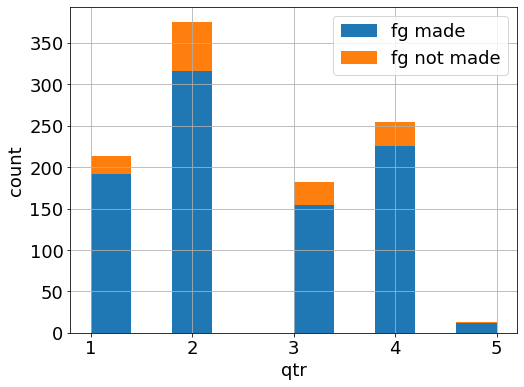

In [23]:
import matplotlib.pyplot as plt
feature = 'qtr'
plt.rcParams.update({'font.size': 18})
plt.subplots(1, 1, figsize=(8,6))
plt.hist([df.query('fg_made == 1')[feature],
          df.query('fg_made == 0')[feature]],
          stacked=True)
plt.ylabel('count')
plt.xlabel(feature)
plt.grid()
plt.legend(['fg made', 'fg not made']);

### Scaling

- Here we have a lot of numeric data at different scales
- To better compare the coefficients of our logistic regression model let's scale our data

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Now fit the model!

In [18]:
model = LogisticRegression(random_state=123).fit(X_train, y_train)

- And find the error rate on the test data

In [19]:
print(f"Error rate = {1 - model.score(X_test, y_test):.2f}")

Error rate = 0.10


- We get a decently low error rate which is cool
- However, it's always important to compare this error rate to a **null model**
- Generally, the null model in a classification problem is just the model that predicts the mode response all of the time
- The code below displays the percentage of the dataset fo which field goals were made/not made

In [21]:
df['fg_made'].value_counts(normalize=True)

1    0.866218
0    0.133782
Name: fg_made, dtype: float64

- So we see that our null model has an error rate of just over 0.13
- Our logistic model is doing only a little bit better than this (but as we're about to see, it's useful in other ways too)

### Now interpret the model!

- One of the key advantages of logistic regression (versus other ML methods) is that we can interpret the coefficients
- The code below prints a dataframe of feature names and their respective coefficient values

In [22]:
pd.DataFrame({'names': df.columns[:-1],
              'coefs': model.coef_[0]}).sort_values(by='coefs')

,names,coefs
2,distance,-1.132406
3,homekick,-0.151305
4,offscore,0.115692
5,defscore,0.146823
0,qtr,0.287874
1,time_remaining,0.357363


- What do we see here?
- We notice that the feature `distance` is by far the most influential feature
- It has a negative value, which means that as distance increase, the probability of field goal decrease, just like we suspected!
- What else do you interpret from these numbers?

- We can have a look at how `distance` influences the probability of making a field goal
- To observe the impact of changing just one feature in a greression model, we should hold all other values constant
- Let's hold the other features at their means (although we could use any values)
- We can use `df.describe()` or `df.mean()` to get the mean and other summary statistics

In [25]:
df.mean()

qtr                2.497594
time_remaining    27.968239
distance          36.666025
homekick           0.494706
offscore           9.949952
defscore           9.567854
fg_made            0.866218
dtype: float64

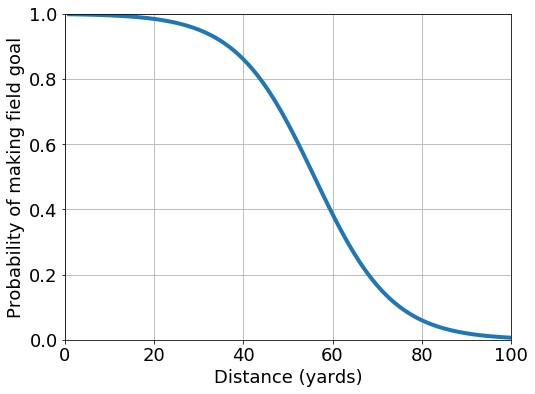

In [26]:
dist_dict = {'distance': np.arange(1,101), 
             'probability': []}
for d in dist_dict['distance']:
    data = np.array([[2.5, 28, d, 0.5, 9.9, 9.6]])  # create some data to predict, we are only changing the "distance" feature
    data = scaler.transform(data)  # dont forget to scale it!
    prediction = model.predict_proba(data)[0][1]
    dist_dict['probability'].append(prediction)
# Now plot the data
plt.subplots(1, 1, figsize=(8,6))
plt.plot(dist_dict['distance'], dist_dict['probability'], lw=4)
plt.ylabel('Probability of making field goal')
plt.xlabel('Distance (yards)')
plt.xlim(0, 100)
plt.ylim(0, 1)
plt.grid()

## 2.4 Why logistic regression?

- Simple and fast
- Provides an interpretable model
- Generally not too concerned with tuning hyperparams
- Good to use as a baseline model before trying more complex models

# -------- Break (10 mins) -------- <a id="break"></a>

# 4. Naive Bayes (30 mins) <a id=4></a>

## 4.1 A conceptual introduction
- Naive Bayes is the most common algorithm used for text classification problems (amongst others)
- Do you have a spam filter? Spam filters are based on text classification. Your filter is reading an incoming email, and deciding whether it is spam or not spam based on the content.
- Other applications of naive bayes:
    - Folder ordering, document clustering, etc.
    - Sentiment analysis (e.g., movies, restaruants, etc.)
    - Classifying products into groups based on descriptions
- Naive bayes is based on Bayes rule and it's pretty simple

- Bayes rule:

<img src='./img/bayes.png' width="600"> 

- We are going to do some naive Bayes calculations from scratch
- It's going to get pretty "mathy" but I promise it will be worth it!
- Below we have a few sentences and they are classed as either being related to **Python** or to **R**

In [27]:
df = pd.DataFrame({'sentence': ['Use the pipe operator',
                                 'Broadcasting is hard',
                                 'Chaining in Pandas is hard',
                                 'dplyr is fun',
                                 'Use Pandas for tables'],
                   'software': ['R', 'Python', 'Python', 'R', 'Python']})
df

,sentence,software
0,Use the pipe operator,R
1,Broadcasting is hard,Python
2,Chaining in Pandas is hard,Python
3,dplyr is fun,R
4,Use Pandas for tables,Python


- As we know, we need to encode categorical data into numeric data in order to use it with ML
- How do we do this for text data?
- We use **"bag-of-words"** representation
- This is kind of like one-hot-encoding and is best seen by example

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df['sentence']).toarray()
bow = pd.DataFrame(X, columns=sorted(cv.vocabulary_), index=df['sentence'])
bow

,broadcasting,chaining,dplyr,for,fun,hard,in,is,operator,pandas,pipe,tables,the,use
sentence,,,,,,,,,,,,,,
Use the pipe operator,0,0,0,0,0,0,0,0,1,0,1,0,1,1
Broadcasting is hard,1,0,0,0,0,1,0,1,0,0,0,0,0,0
Chaining in Pandas is hard,0,1,0,0,0,1,1,1,0,1,0,0,0,0
dplyr is fun,0,0,1,0,1,0,0,1,0,0,0,0,0,0
Use Pandas for tables,0,0,0,1,0,0,0,0,0,1,0,1,0,1


- So we form a unique column for every word and then count how many times that words occurs in an email

- Now say I have a new sentence: "**Pandas is fun**"
- Is this related to **Python** or to **R**?
- We are going to calculate it from scratch using Naive Bayes!
- What we want to know is: 

$$P(\textrm{Python}|\textrm{"Pandas is fun"})$$

$$P(\textrm{R}|\textrm{"Pandas is fun"})$$

- We really only care which one of these is bigger so that we can classify our new email as spam or not spam

$$P(\textrm{Python}|\textrm{"Pandas is fun"}) > P(\textrm{R}|\textrm{"Pandas is fun"})$$

- Substituting into Bayes rule we get:

$$\frac{P(\textrm{"Pandas is fun"}|\textrm{Python})*P(\textrm{Python})}{P(\textrm{"Pandas is fun"})}>\frac{P(\textrm{"Pandas is fun"}|\textrm{R})*P(\textrm{R})}{P(\textrm{"Pandas is fun"})}$$

- Now, there are two reasons naive Bayes is so easy
    1. We can cancel out the denominator
    2. We will simplify the numerator
    
    
- The "naive" part of naive Bayes is that we assume each feature (word) is conditionally independent
- Put simply:

$$P(\textrm{"Pandas is fun"}|\textrm{Python})=P(\textrm{"Pandas"}|\textrm{Python})*P(\textrm{"is"}|\textrm{Python})*P(\textrm{"fun"}|\textrm{Python})$$

- So what our equation has boiled down to is:

$$P(\textrm{"Pandas"}|\textrm{Python})*P(\textrm{"is"}|\textrm{Python})*P(\textrm{"fun"}|\textrm{Python}) * P(Python) > $$

$$P(\textrm{"Pandas"}|\textrm{R})*P(\textrm{"is"}|\textrm{R})*P(\textrm{"fun"}|\textrm{R})*P(R)$$

- Now we just need to calculate each of those probabilities which is easy!
- The easiest way to calculate these probabilities is simply by counting the number of each word and dividing by the total!
- Unfortunately, if a particular word/class combo does not occur in our data we would calculate a 0 probability (e.g., the words "Pandas" does not occur in training data with class "R")
- Instead, we calculate each probability using something called Laplace smoothing (basically it is just a count of the words plus a constant $\alpha$ to prevent 0 probabilities):

$$P_i = \frac{word_i+\alpha}{N+\alpha d}$$

- $word_i$ is the count of word *i*
- *N* is the number of unique words across all classes (14)
- *d* is the number of total words in a particular class (Python = 12, R = 7)
- Let's also assume $\alpha=1$.


- As an example, let's do $P(\textrm{"Pandas"}|\textrm{Python})$
- We have 2 occurrences of "Pandas" when the label is "Python"
- Therefore:

$$\theta_{"Pandas"} =\frac{2+1}{14+12*1} = 0.115$$

- Similar reasoning applies for the rest of the words...

|word|*P(word\|Python)*|*P(word\|R)*|
|---|---|---|
|Pandas|0.115|0.048|
|is|0.115|0.095|
|fun|0.038|0.095|

We can calculate the priors simply as the fraction of **Python** and **R** in the original dataset:

|*P(Python)*|*P(R)*|
|---|---|
|3/5 = 0.6|2/5 = 0.4|

Now we have everything we need to do our calculations!

$$P(\textrm{Python}|\textrm{"Pandas is fun"}) = P(\textrm{"Pandas"}|\textrm{Python})*P(\textrm{"is"}|\textrm{Python})*P(\textrm{"fun"}|\textrm{Python})*P(\textrm{Python}) = 0.115*0.115*0.038*\frac{3}{5}$$

$$P(\textrm{R}|\textrm{"Pandas is fun"}) = P(\textrm{"Pandas"}|\textrm{R})*P(\textrm{"is"}|\textrm{R})*P(\textrm{"fun"}|\textrm{R})*P(\textrm{R}) = 0.048*0.095*0.095*\frac{2}{5}$$

In [30]:
p_python = 0.115*0.115*0.038*(3/5)
p_r = 0.048*0.095*0.095*(2/5)

In [31]:
p_python

0.00030153

In [32]:
p_r

0.00017328000000000002

In [33]:
if p_python > p_r:
    print('"Pandas is fun" belongs to class: Python')
else:
    print('"Pandas is fun" belongs to class: R')

"Pandas is fun" belongs to class: Python


- Right now our probabilities don't add up to 1
- But we can normalise them so that they do

In [34]:
p_total = p_python + p_r
print(f'Probability that "Pandas is fun" belongs to class Python: {p_python/p_total:.2f}')
print(f'     Probability that "Pandas is fun" belongs to class R: {p_r/p_total:.2f}')

Probability that "Pandas is fun" belongs to class Python: 0.64
     Probability that "Pandas is fun" belongs to class R: 0.36


- Now to the best bit!
- Let's verify our result using sklearn
- The main Naive Bayes classifier in sklearn is called `MultinomialNB` and exists in the `naive_bayes` module

In [35]:
from sklearn.naive_bayes import MultinomialNB
X = bow
y = df['software']

In [38]:
nb = MultinomialNB(alpha=1)
nb.fit(X, y)
X_test = cv.transform(['Pandas is fun']).toarray()
pd.DataFrame(data = nb.predict_proba(X_test),
             columns = nb.classes_)

,Python,R
0,0.640071,0.359929


- The answers match, we did it!!! SO COOL!

## 4.2 Analyzing a real-world dataset of Twitter data bout airlines

- As an example of real-world sentiment analysis, we will look at a Twitter dataset of tweets about US airlines
- The dataset is avaiable from Kaggle [here](https://www.kaggle.com/crowdflower/twitter-airline-sentiment)

In [2]:
df = pd.read_csv('data/twitter-airline-sentiment.csv')
df

,sentiment,tweet
0,positive,@VirginAmerica plus you've added commercials t...
1,negative,@VirginAmerica it's really aggressive to blast...
2,negative,@VirginAmerica and it's a really big bad thing...
3,negative,@VirginAmerica seriously would pay $30 a fligh...
4,positive,"@VirginAmerica yes, nearly every time I fly VX..."
...,...,...
11536,negative,@AmericanAir my flight was Cancelled Flightled...
11537,negative,@AmericanAir right on cue with the delays👌
11538,positive,@AmericanAir thank you we got on a different f...
11539,negative,@AmericanAir leaving over 20 minutes Late Flig...


- Let's take a look at some of the tweets:

In [3]:
# Positive
df['tweet'].iloc[18]

'@VirginAmerica I love the hipster innovation. You are a feel good brand.'

In [4]:
# Negative
df['tweet'].iloc[20]

"@VirginAmerica status match program.  I applied and it's been three weeks.  Called and emailed with no response."

- There is a lot of data here and we are going to do a very simply text analysis
- Let's vectorize ("bag-of-words") our data so we can use it with Naive Bayes

In [6]:
cv = CountVectorizer()
X = cv.fit_transform(df['tweet'])
y = df['sentiment']

In [43]:
X

<11541x12642 sparse matrix of type '<class 'numpy.int64'>'
	with 193003 stored elements in Compressed Sparse Row format>

- Let's see exactly how many unique words there are after vectorizing them

In [44]:
X.shape

(11541, 12642)

- One thing we can do to narrow in on words that are actually meaningful is remove words that are not!
- For example, "a", "is", "the"
- Luckily, sklearn has a built-in dictionary of these words which we can leverage
- We can use the argument `stop_words` to remove common words in the English language

In [7]:
cv = CountVectorizer(stop_words='english')
X = cv.fit_transform(df['tweet'])
y = df['sentiment']

In [46]:
X.shape

(11541, 12364)

- Cool, we removed about 300 likely useless words from our analysis
- Now let's split into training and testing sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=123)

- The last step is to fit the model and find the error on the test data!

In [26]:
import matplotlib.pyplot as plt

In [13]:
model = MultinomialNB(alpha=1)
model.fit(X_train, y_train)
print(f"Error rate = {1 - model.score(X_test, y_test):.2f}")

Error rate = 0.11


- As before, let's quickly compare our result to the null model

In [49]:
df['sentiment'].value_counts(normalize=True)

negative    0.795252
positive    0.204748
Name: sentiment, dtype: float64

- In this case, our model is doing about twice as good as the null model in terms of error rate!
- Of course, if we want a more robust estimate of error, we could repeat our analysis using cross-validation

In [50]:
from sklearn.model_selection import cross_validate
cv_score = cross_validate(model, X, y, cv=10)
print(f"CV error rate = {1 - cv_score['test_score'].mean():.2f}")

CV error rate = 0.12


- So it looks like we have a pretty good model relating airline tweets to sentiments!
- Let's play around with our model for a bit of fun

In [53]:
# tweet = 'That was the best flight ever! I was very comfortable!'
tweet = ''
pd.DataFrame(data = model.predict_proba(cv.transform([tweet])),
             columns = model.classes_)

,negative,positive
0,0.989112,0.010888


# 5. Logistic Regression vs Naive Bayes (5 mins) <a id=5></a>

- Both are simple, fast, probabilistic classifiers
- Both work well with large numbers of features
- Naive Bayes has very strong conditional independence assumptions. So not great when features are correlated.
- Naive Bayes is generally a bad estimator (i.e., the probabilities it estimates are often not great) but it is a good classifier
- Logistic regression is generally more robust to correlated features

# 6. True/false questions (5 mins) <a id=6></a>
- Naive Bayes should only be used if the "naive" conditional independence assumption holds for your problem.
- Naive Bayes can only be used for binary classification (i.e., a two response problem).
- Logistic regression could be considered to be more interpretable than a Decision Tree classifier.
- Scaling of features is required before training a Logistic Regression model.

# 7. Summary questions to ponder <a id=7></a>

1. We've now learned most of the basic ML algorithms, but how do we choose between them?
2. Furthermore, which features are important in our our model? How do we choose which ones to include?